In [0]:
import jieba

In [0]:
breakword = jieba.cut('我今天要到台北松山機場出差')

In [0]:
print(list(breakword))

['我', '今天', '要', '到', '台北', '松山', '機場', '出差']


In [0]:
!ls

dict.txt  dict.txt.big	sample_data  stopwords.txt


In [0]:
!wget https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big

--2019-10-21 09:27:56--  https://raw.githubusercontent.com/fxsjy/jieba/master/extra_dict/dict.txt.big
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8583143 (8.2M) [text/plain]
Saving to: ‘dict.txt.big’

dict.txt.big        100%[===================>]   8.18M  --.-KB/s    in 0.1s    

2019-10-21 09:27:59 (64.2 MB/s) - ‘dict.txt.big’ saved [8583143/8583143]



In [0]:
jieba.set_dictionary('dict.txt.big')

In [0]:
breakword = jieba.cut('我今天要到, 台北松山機場出差', cut_all=False)

In [0]:
print(list(breakword))

['我', '今天', '要', '到', ',', ' ', '台北', '松山機場', '出差']


In [0]:
!wget https://raw.githubusercontent.com/zake7749/word2vec-tutorial/master/jieba_dict/stopwords.txt

--2019-10-21 09:38:06--  https://raw.githubusercontent.com/zake7749/word2vec-tutorial/master/jieba_dict/stopwords.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8116 (7.9K) [text/plain]
Saving to: ‘stopwords.txt.1’

stopwords.txt.1     100%[===================>]   7.93K  --.-KB/s    in 0s      

2019-10-21 09:38:07 (85.9 MB/s) - ‘stopwords.txt.1’ saved [8116/8116]



In [0]:
stopWords=[]
with open('stopwords.txt.1', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [0]:
stopWords

[',',
 '?',
 '、',
 '。',
 '“',
 '”',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '人民',
 '末##末',
 '啊',
 '阿',
 '哎',
 '哎呀',
 '哎喲',
 '唉',
 '俺',
 '俺們',
 '按',
 '按照',
 '吧',
 '吧噠',
 '把',
 '罷了',
 '被',
 '本',
 '本著',
 '比',
 '比方',
 '比如',
 '鄙人',
 '彼',
 '彼此',
 '邊',
 '別',
 '別的',
 '別說',
 '並',
 '並且',
 '不比',
 '不成',
 '不單',
 '不但',
 '不獨',
 '不管',
 '不光',
 '不過',
 '不僅',
 '不拘',
 '不論',
 '不怕',
 '不然',
 '不如',
 '不特',
 '不惟',
 '不問',
 '不只',
 '朝',
 '朝著',
 '趁',
 '趁著',
 '乘',
 '衝',
 '除',
 '除此之外',
 '除非',
 '除了',
 '此',
 '此間',
 '此外',
 '從',
 '從而',
 '打',
 '待',
 '但',
 '但是',
 '當',
 '當著',
 '到',
 '得',
 '的',
 '的話',
 '等',
 '等等',
 '地',
 '第',
 '叮咚',
 '對',
 '對於',
 '多',
 '多少',
 '而',
 '而況',
 '而且',
 '而是',
 '而外',
 '而言',
 '而已',
 '爾後',
 '反過來',
 '反過來說',
 '反之',
 '非但',
 '非徒',
 '否則',
 '嘎',
 '嘎登',
 '該',
 '趕',
 '個',
 '各',
 '各個',
 '各位',
 '各種',
 '各自',
 '給',
 '根據',
 '跟',
 '故',
 '故此',
 '固然',
 '關於',
 '管',
 '歸',
 '果然',
 '果真',
 '過',
 '哈',
 '哈哈',
 '呵',
 '和',
 '何',
 '何處',
 '何況',
 '何時',
 '嘿',
 '哼',
 '哼唷',
 '呼哧',
 '乎',
 '譁',
 '還是',
 '還有',
 '換句話說',
 '換言之',
 '或',
 

In [0]:
breakword = jieba.cut('我今天要到, 台北松山機場出差', cut_all=False)
for word in breakword:
  if word not in stopWords:
    print('1' + word)
  else:
    print('2' + word)

2我
1今天
2要
2到
2,
1 
1台北
1松山機場
1出差


In [0]:
breakword = jieba.cut('我今天要到, 台北松山機場出差蔡英文', cut_all=False)
[word for word in breakword if word not in stopWords and not word.isspace()]

['今天', '台北', '松山機場', '出差', '蔡', '英文']

In [0]:
from wordcloud import WordCloud
from bs4 import BeautifulSoup as soup
import requests

In [0]:
urls = []
url = 'https://udn.com/news/breaknews/1'
html = requests.get(url)
sp = soup(html.text, 'html.parser')
data1 = sp.select('#breaknews_body dl dt h2 a')
for d in data1:
  urls.append('https://udn.com' + d.get('href'))


In [0]:
ii = 1
text_news = []
for url in urls:
  print(ii)
  html = requests.get(url)
  sp = soup(html.text, 'html.parser')
  data1 = sp.select('#story_body_content p')
  for d in data1:
    if d.text.find('延伸閱讀') != -1:
      break
    if d.text != '':
      text_news.append(d.text)
  ii = ii + 1

In [0]:
text_news = ' '.join(text_news)

In [0]:
terms = []
breakword = jieba.cut(text_news, cut_all=False)
terms = [word for word in breakword if word not in stopWords and not word.isspace()]

In [0]:
from collections import Counter

In [0]:
diction = Counter(terms)

In [0]:
diction

Counter({'大陸': 30,
         '福建省': 1,
         '晉江': 1,
         '籍': 1,
         '「': 352,
         '閩晉': 1,
         '漁': 1,
         '05378': 1,
         '號': 4,
         '」': 352,
         '漁船': 3,
         '洪姓': 3,
         '船長': 3,
         '今年': 33,
         '月間': 1,
         '未經許可': 1,
         '進入': 4,
         '我國': 11,
         '限制': 5,
         '水域': 3,
         '進行': 20,
         '拖網': 1,
         '捕漁': 1,
         '作業': 2,
         '全日': 1,
         '鑫': 1,
         '66': 1,
         '衝突': 3,
         '海巡': 8,
         '署': 6,
         '基隆': 1,
         '巡防艦': 3,
         '下令': 2,
         '閩晉號': 2,
         '停航': 1,
         '洪不': 1,
         '理會': 1,
         '撞壞': 2,
         '左側': 1,
         '舷外機': 1,
         '多處': 3,
         '後': 68,
         '逃逸': 1,
         '10': 78,
         '月初': 3,
         '洪': 3,
         '開船': 1,
         '駛入': 1,
         '富貴': 1,
         '角': 1,
         '遭': 5,
         '桃園': 7,
         '扣押': 1,
         '地檢署': 4,
         '今天下午': 12

In [0]:
cloud = WordCloud(font_path='/usr/share/fonts/truetype/liberation/simhei.ttf')

In [0]:
cloud.generate_from_frequencies(frequencies=diction)

In [0]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf"

--2019-10-21 10:50:06--  http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf
Resolving d.xiazaiziti.com (d.xiazaiziti.com)... 67.198.189.58
Connecting to d.xiazaiziti.com (d.xiazaiziti.com)|67.198.189.58|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/octet-stream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  1.62MB/s    in 6.4s    

2019-10-21 10:50:13 (1.49 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050868/10050868]



In [0]:
import matplotlib.pyplot as plt
#import matplotlib as mpl
#zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
#mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')

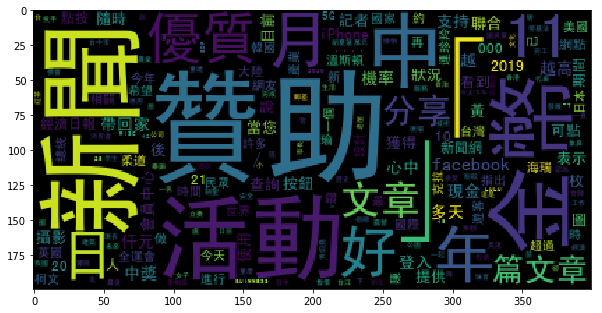

In [0]:
plt.figure(figsize=(10, 10))
plt.imshow(cloud)
plt.show()